# Using MSGraph API to Organze Calendar Events
This notebook will demonstrate the pulling and organizing of upcoming meetings from an individual MS Outlook calendar.

The output of this notebook is not end goal, but rather a proof of concept showing one way Python can access calendar events.

### Step 1: Creating an App
This is pretty straightforward as we are just creating a very simple program

in the Azure Portal, navigate to App Registrations.

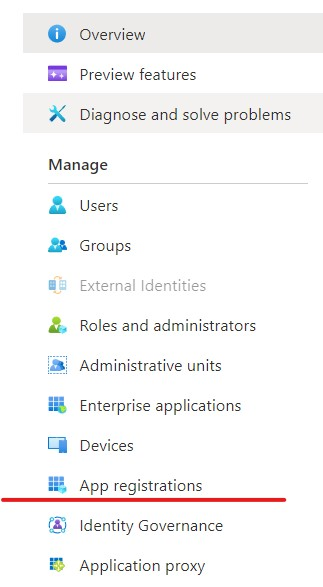

### Step 2: Editing Permissions
Go to Microsoft's Graph explorer and consent to the Calendars.Read Query

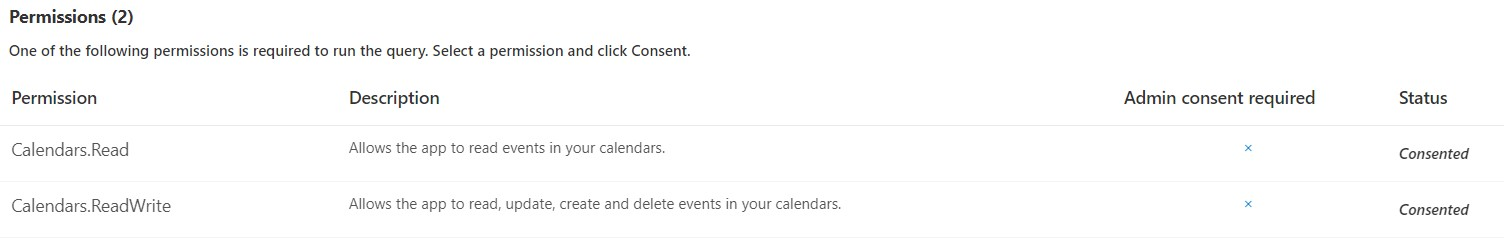

### Step 3: Verify Permissions for App
Head back to App registrations and find API permisssions. Verify that we have Calendars.Read permitted.
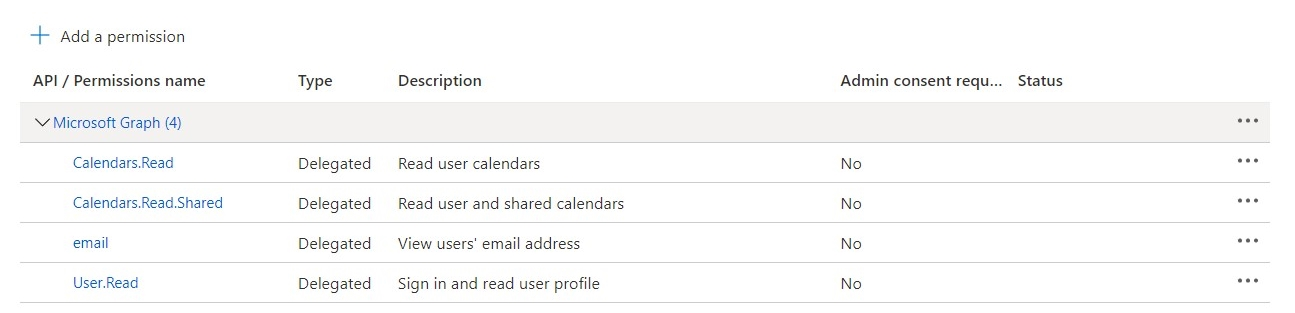

### Step 4: Generate a secret
Under Certificates & secrets, choose New client secret. Copy the value and save. This will grant your program access to your application.

### Build the program

In [2]:
# Imports
from O365 import Account, MSGraphProtocol
import datetime
import pandas as pd

In [3]:
# Setting our App ID and Secret ID

APPLICATION_ID = '####################################'
CLIENT_SECRET = '#####################################'

In [4]:
# credentials are a tuple of app ID and secrect ID 
credentials = (APPLICATION_ID, CLIENT_SECRET)

# We will be using Graph and it's protocol as well as the permission from above as the scope
protocol = MSGraphProtocol()
scopes = ['Calendars.Read.Shared']
account = Account(credentials, protocol=protocol)

In [7]:
if account.authenticate(scopes=scopes):
    print("Authenticated!")

Visit the following url to give consent:
https://login.microsoftonline.com/common/oauth2/v2.0/authorize?response_type=code&client_id=745fd147-48b9-4e5e-94a2-e3d591a2660c&redirect_uri=https%3A%2F%2Flogin.microsoftonline.com%2Fcommon%2Foauth2%2Fnativeclient&scope=Calendars.Read.Shared&state=RfyHymE3RnIiY7Qt8DX7UOK6U4Flom&access_type=offline
Paste the authenticated url here:
https://login.microsoftonline.com/common/oauth2/nativeclient?code=0.AQMAVaYtsJsBgkKUkFMO2RU_yEfRX3S5SF5OlKLj1ZGiZgwDAJ0.AQABAAIAAAD--DLA3VO7QrddgJg7WevrIjjZ_V2JhFgAO55zM9Z7DmN0wtMg892NxJbwvy36XYy-9XdsQTDyfNAQhrIe1g9PysM_IGT92kVIWd9uaSpz40myTe57a8oc5EFEY5N6vt_LIldrQW-hVoaZrAuYNegzm1Nx1ey--nurvW3UPVhuZsBY7CujlYieEdA5AERqxujaBYoTrK4Bw_YGx9Z-X9Jw9yRJ9rEeoERumH4apM2VVEqSmQh56LGolnf5_W9ir8-3_qvBjTDBHt3qcddbkxFx6mNqLoYsG49Z8VCrsXOZdQ7IvvY5UjSX2K6B_wYLJS_x6dvZr7ecHx5KNHvpif-b-CQvK9GuzSysxCWG7-KcSPsb74dAmROc7jgIT7QEkjqXVIBBuI1gpuBpxwWD2snDC2p7z3PZMizauQTyA8jFLORC8EJwlD3EkzMpkiBiVsZhcYJAjxDoqht1veDdSr6IZz268b2AKe-wmnxjiIebOQ5zy

### Authentication Step
The cell above will open a tab asking you to login to the Microsoft Azure Portal and grant access to your program. 

From there, copy and paste the URL into the terminal.

If everything was done correctly, you should now have access to the API.

### Accessing our personal Outlook calendar

In [8]:
schedule = account.schedule()
calendar = schedule.get_default_calendar()
events = calendar.get_events(include_recurring=False)

event_info = []


# The fields we are interested in are subject, date, start, and end
# These data require a bit of manipulation to get them in our desired format
for event in events:
    subject = event.subject
    date = event.start.date().isoformat()
    start = event.start.time().strftime("%H:%M")
    end = event.end.time().strftime("%H:%M")
    event_info.append([subject, date, start, end])

### Convert to Pandas DataFrame

In [10]:
columns = ['Subject', 'Date', 'Start', 'End']
df = pd.DataFrame(event_info, columns=columns)

In [11]:
df.head()

,Unnamed: 0,Subject,Date,Start,End
0,0,Amanda/Doug/Austin CSS,2022-03-17,12:00,13:00
1,1,Scheduler Revamp Next Steps,2022-03-16,16:00,16:30
2,2,Family Vacation,2022-05-08,20:00,20:00
3,3,Gavin and Doug,2022-03-11,13:45,14:00
4,4,Time with Lodish to discuss R-trees and next s...,2022-03-11,11:30,12:00


In [12]:
df.to_csv('Calendar-Events.csv')